In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Machine_Learning\Lab\train.csv")
test_df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Machine_Learning\Lab\test.csv")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8960\1091148969.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Machine_Learning\Lab\train.csv")


In [3]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
df.shape

(100000, 28)

In [5]:
df.isnull().sum().nlargest(10)

Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Name                        9985
Credit_History_Age          9030
Num_of_Delayed_Payment      7002
Amount_invested_monthly     4479
Num_Credit_Inquiries        1965
Monthly_Balance             1200
ID                             0
Customer_ID                    0
dtype: int64

In [6]:
salary_mean=df.Monthly_Inhand_Salary.mean()
df.Monthly_Inhand_Salary=df.Monthly_Inhand_Salary.replace(np.nan,salary_mean)

In [7]:
df.Num_of_Delayed_Payment=df.Num_of_Delayed_Payment.astype(str).str.replace("_",'')
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].apply(lambda x: float(x))

In [8]:
df.Num_of_Delayed_Payment=df.Num_of_Delayed_Payment.ffill()

In [9]:
df.Monthly_Balance=df.Monthly_Balance.astype(str).str.replace("_",'')
df.Monthly_Balance=df.Monthly_Balance.apply(lambda x:float(x))

In [10]:
df.Monthly_Balance=df.Monthly_Balance.ffill()

In [11]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace('Months','')
df.Credit_History_Age=df.Credit_History_Age.apply(lambda x: float(x))

In [12]:
df.Credit_History_Age.ffill(axis=0,inplace=True)

In [13]:
df.Age=df.Age.astype(str).str.replace("_",'')

In [14]:
df.Age=df.Age.apply(lambda x: float(x))
df[df.Age>80].shape

(1895, 28)

In [15]:
df["Credit_Score"]=df["Credit_Score"].replace({"Good":"low_risk","Standard":"medium_risk","Poor":"high_risk"})

In [16]:
df["Credit_Score"]

0           low_risk
1           low_risk
2           low_risk
3           low_risk
4           low_risk
            ...     
99995      high_risk
99996      high_risk
99997      high_risk
99998    medium_risk
99999      high_risk
Name: Credit_Score, Length: 100000, dtype: object

In [17]:
 df=df.drop_duplicates()


In [18]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [19]:
df=df.drop(["ID","Customer_ID","Name",],axis=1)

In [20]:
df=df[['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Monthly_Inhand_Salary','Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score']]

In [21]:
df.dtypes

Age                       float64
Occupation                 object
Annual_Income              object
Delay_from_due_date         int64
Num_of_Delayed_Payment    float64
Monthly_Inhand_Salary     float64
Outstanding_Debt           object
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [22]:
df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace('_','')
df.Annual_Income = pd.to_numeric(df['Annual_Income'])
df.Annual_Income

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

In [23]:
df["Annual_Income"].dtype

dtype('float64')

In [24]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace('Months','')


In [25]:
df['Credit_History_Age']=df['Credit_History_Age'].apply(lambda x:float(x))

In [26]:
df['Credit_History_Age']

0        22.1
1        22.1
2        22.3
3        22.4
4        22.5
         ... 
99995    31.6
99996    31.7
99997    31.8
99998    31.9
99999    31.1
Name: Credit_History_Age, Length: 100000, dtype: float64

In [27]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')

df.Payment_Behaviour=df.Payment_Behaviour.apply(lambda x:int(x))

In [28]:
df.Payment_Behaviour

0        4
1        3
2        2
3        1
4        5
        ..
99995    6
99996    5
99997    6
99998    3
99999    4
Name: Payment_Behaviour, Length: 100000, dtype: int64

In [29]:

df['Credit_Score'] = df['Credit_Score'].astype(str).str.replace('low_risk','3')
df['Credit_Score'] = df['Credit_Score'].astype(str).str.replace('medium_risk','2')
df['Credit_Score'] = df['Credit_Score'].astype(str).str.replace('high_risk','1')
df.Credit_Score = df.Credit_Score.apply(lambda x:int(x))



df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('NM', '0')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('Yes', '1')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('No', '2')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x:int(x))


In [30]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace('_','')
df.Outstanding_Debt=pd.to_numeric(df["Outstanding_Debt"])

In [31]:
Q1 = df.Annual_Income.quantile(0.25)
Q3 = df.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df = df.drop(df.loc[df['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df= df.drop(df.loc[df['Annual_Income'] < (Q1 - 1.5 * IQR)].index)

In [32]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
df = df.drop(df.loc[df['Age'] > (Q3 + 1.5 * IQR)].index)
df= df.drop(df.loc[df['Age'] < (Q1 - 1.5 * IQR)].index)


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

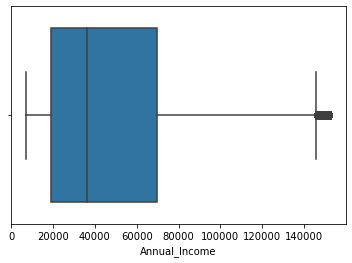

In [33]:
sns.boxplot(df["Annual_Income"])

<AxesSubplot:xlabel='Outstanding_Debt'>

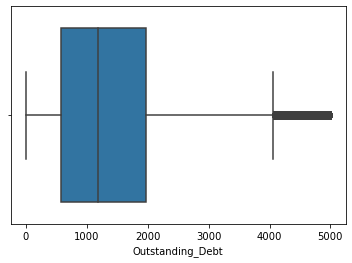

In [34]:
sns.boxplot(x=df['Outstanding_Debt'])

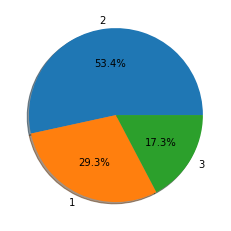

In [35]:
label = df.Credit_Score.value_counts().index
label_count = df.Credit_Score.value_counts().values
plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Monthly_Inhand_Salary,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.090443,-0.172844,0.000546,0.081421,-0.202710,0.231597,0.184264,0.000441,0.032298,-0.001759,0.161274
Annual_Income,0.090443,1.000000,-0.226208,0.001718,0.920164,-0.259157,0.252157,0.179067,0.008332,0.299390,-0.001351,0.198818
Delay_from_due_date,-0.172844,-0.226208,1.000000,0.012380,-0.208535,0.569333,-0.481407,-0.335567,-0.004656,-0.076556,0.004719,-0.429561
Num_of_Delayed_Payment,0.000546,0.001718,0.012380,1.000000,0.001490,0.010334,-0.008828,-0.008801,0.000435,0.003037,0.000919,-0.007754
Monthly_Inhand_Salary,0.081421,0.920164,-0.208535,0.001490,1.000000,-0.239133,0.233275,0.164766,0.006827,0.275722,-0.001243,0.180141
Outstanding_Debt,-0.202710,-0.259157,0.569333,0.010334,-0.239133,1.000000,-0.621745,-0.326159,-0.005456,-0.090089,0.001508,-0.386732
Credit_History_Age,0.231597,0.252157,-0.481407,-0.008828,0.233275,-0.621745,1.000000,0.384722,0.004457,0.084326,-0.003378,0.382849
Payment_of_Min_Amount,0.184264,0.179067,-0.335567,-0.008801,0.164766,-0.326159,0.384722,1.000000,0.000188,0.059075,0.000071,0.292416
Total_EMI_per_month,0.000441,0.008332,-0.004656,0.000435,0.006827,-0.005456,0.004457,0.000188,1.000000,0.004512,-0.000277,0.005004
Payment_Behaviour,0.032298,0.299390,-0.076556,0.003037,0.275722,-0.090089,0.084326,0.059075,0.004512,1.000000,0.005220,0.112576


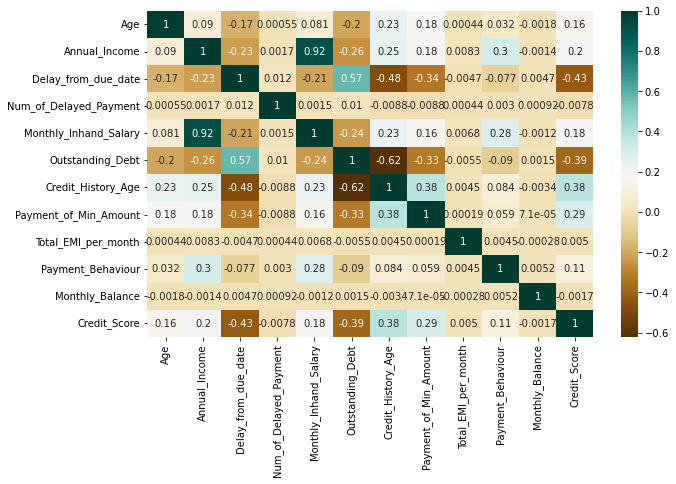

In [36]:
plt.figure(figsize=(10,6))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df[col_float]:
    df[i] = scaler.fit_transform(df[[i]])
df.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Monthly_Inhand_Salary,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.214286,Scientist,0.083178,0.111111,0.002273,1824.843333,0.16202,0.652819,2,0.000602,4,1.0,3
1,0.214286,Scientist,0.083178,0.055556,0.002273,4194.170850,0.16202,0.652819,2,0.000602,3,1.0,3
3,0.214286,Scientist,0.083178,0.138889,0.001591,4194.170850,0.16202,0.661721,2,0.000602,1,1.0,3
4,0.214286,Scientist,0.083178,0.152778,0.001591,1824.843333,0.16202,0.664688,2,0.000602,5,1.0,3
5,0.214286,Scientist,0.083178,0.180556,0.001591,4194.170850,0.16202,0.667656,2,0.000602,4,1.0,3


In [39]:
df = pd.get_dummies(df, prefix='Occupation', columns=['Occupation'], drop_first=False)
df.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Monthly_Inhand_Salary,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________
0,0.214286,0.083178,0.111111,0.002273,1824.843333,0.16202,0.652819,2,0.000602,4,...,0,0,0,0,0,0,1,0,0,0
1,0.214286,0.083178,0.055556,0.002273,4194.170850,0.16202,0.652819,2,0.000602,3,...,0,0,0,0,0,0,1,0,0,0
3,0.214286,0.083178,0.138889,0.001591,4194.170850,0.16202,0.661721,2,0.000602,1,...,0,0,0,0,0,0,1,0,0,0
4,0.214286,0.083178,0.152778,0.001591,1824.843333,0.16202,0.664688,2,0.000602,5,...,0,0,0,0,0,0,1,0,0,0
5,0.214286,0.083178,0.180556,0.001591,4194.170850,0.16202,0.667656,2,0.000602,4,...,0,0,0,0,0,0,1,0,0,0


In [40]:
x=df.drop('Credit_Score',axis = 1)

In [41]:
y=df['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
#RBF="Radial Basis Function"
svm_model=SVC(C=1000,kernel='rbf',random_state=0,gamma=0.0055,decision_function_shape='ovo')
svm_model=svm_model.fit(x_train,y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [ ]:
# Print results
print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 Score:', f1*100)

In [ ]:
## The Dataset is too large it contains nearly 1 lakh rows
## variuos parameters are used to increase the Accuracy, but the score is decreasing